# Supplementary figure 2: BALTIC tree plotting

February 20, 2019 

Plot full genome nextstrain trees using baltic. 

In [1]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
import imp
bt = imp.load_source('baltic', '/Users/lmoncla/src/baltic/baltic-frankenstein.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

import numpy as np
from scipy.special import binom

import datetime as dt

In [8]:
from IPython.display import HTML
import re
import copy

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects

import numpy as np

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

#fname = '/Users/lmoncla/src/mumps/auspice/mumps_na_tree.json'
fname='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_mp_tree.json'
json_translation={'absoluteTime':'num_date','height':'branch_length','name':'clade'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
json_meta={'file':fname.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org

ll=bt.loadJSON(fname,json_translation,json_meta) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file

print 'Done!'


Tree height: 0.036939
Tree length: -0.189484
annotations present

Numbers of objects in tree: 6832 (2892 nodes and 3940 leaves)

Done!


In [9]:
mylist = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013",]

colors = {"china":"#4042C7", "southeast_asia":"#4274CE","south_asia":"#5199B7","japan_korea":"#69B091",
          "west_asia":"#ADBD51","africa":"#CEB541","europe":"#E39B39","north_america":"#DC2F24"}
#for k in ll.Objects:
    #if k.branchType == 'leaf':
        #if k.traits['strain'] in mylist: 
            #color = '#fdb771'
        #else: 
            #color = '#000000'

In [10]:
def convertDate(x,start,end):
    """ Converts calendar dates between given formats """
    return dt.datetime.strftime(dt.datetime.strptime(x,start),end)

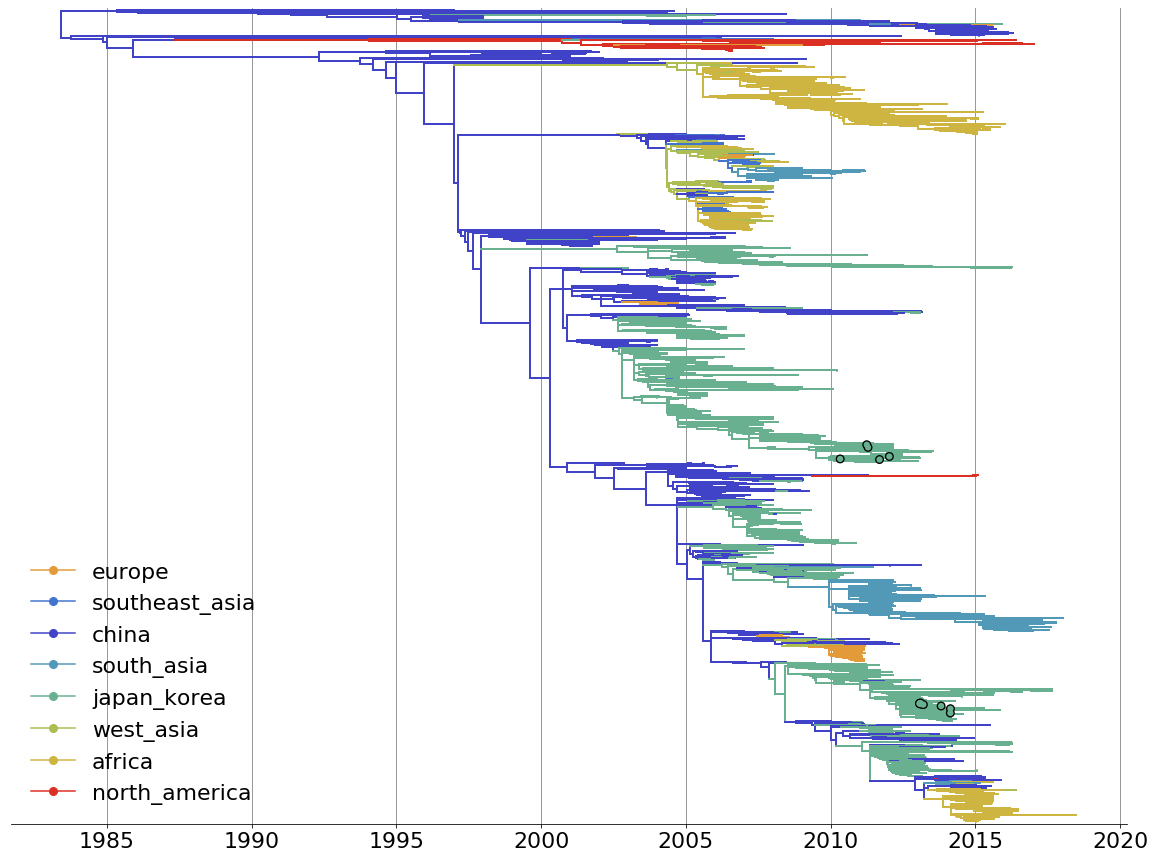

In [11]:
fig,ax = plt.subplots(figsize=(20,15),facecolor='w')

L=len([k for k in ll.Objects if k.branchType=='leaf'])

for k in ll.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or from x position determined earlier
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
        
    c='k'
    if k.traits.has_key(json_meta['traitName']):
        c=ll.cmap[k.traits[json_meta['traitName']]]
    
    branchWidth=2
    
    if k.branchType=='leaf': ## if leaf...
        if k.traits['strain'] in mylist:
            s=40 ## tip size can be fixed
        else:
            s=0
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    elif k.branchType=='node': ## if node...
        #branchWidth+=10.0*len(k.leaves)/float(L)
        #c="#9F9F9F"
        
        if len(k.children)==1:
            ax.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')
        
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
        
    # add in a legend
    han_list = []

    for key in colors:
        marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key,markersize = 8)
        han_list.append(marker)

    ax.legend(handles = han_list,markerfirst = True, frameon=False, loc=3)
        
        
ax.set_ylim(-10,ll.ySpan+10)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

plt.show()

## Run on multiple trees

In [3]:
from IPython.display import HTML
import re
import copy

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects

import numpy as np

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

PB2='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_pb2_tree.json'
PB1='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_pb1_tree.json'
PA='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_pa_tree.json'
HA='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_ha_tree.json'
NP='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_np_tree.json'
NA='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_na_tree.json'
MP='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_mp_tree.json'
NS='/Users/lmoncla/src/avian-flu-h5-Cambodia/auspice/flu_avian_h5n1_ns_tree.json'

json_translation={'absoluteTime':'num_date','height':'branch_length','name':'clade'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
PB2_json_meta={'file':PB2.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
PB1_json_meta={'file':PB1.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
PA_json_meta={'file':PA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
HA_json_meta={'file':HA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NP_json_meta={'file':NP.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NA_json_meta={'file':NA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
MP_json_meta={'file':MP.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NS_json_meta={'file':NS.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org

PB2_tree=bt.loadJSON(PB2,json_translation,PB2_json_meta) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file
PB1_tree =bt.loadJSON(PB1,json_translation,PB1_json_meta)
PA_tree =bt.loadJSON(PA,json_translation,PA_json_meta)
HA_tree =bt.loadJSON(HA,json_translation,HA_json_meta)
NP_tree =bt.loadJSON(NP,json_translation,NP_json_meta)
NA_tree =bt.loadJSON(NA,json_translation,NA_json_meta)
MP_tree =bt.loadJSON(MP,json_translation,MP_json_meta)
NS_tree =bt.loadJSON(NS,json_translation,NS_json_meta)
print 'Done!'


Tree height: 0.058061
Tree length: -1.373523
annotations present

Numbers of objects in tree: 7254 (3191 nodes and 4063 leaves)


Tree height: 0.073344
Tree length: -0.829891
annotations present

Numbers of objects in tree: 6944 (3077 nodes and 3867 leaves)


Tree height: 0.053635
Tree length: -0.324975
annotations present

Numbers of objects in tree: 7361 (3279 nodes and 4082 leaves)


Tree height: 0.024458
Tree length: -0.678843
annotations present

Numbers of objects in tree: 11418 (4987 nodes and 6431 leaves)


Tree height: 0.054975
Tree length: -0.974631
annotations present

Numbers of objects in tree: 7115 (3045 nodes and 4070 leaves)


Tree height: 0.066365
Tree length: -1.148496
annotations present

Numbers of objects in tree: 9355 (3998 nodes and 5357 leaves)


Tree height: 0.036939
Tree length: -0.189484
annotations present

Numbers of objects in tree: 6832 (2892 nodes and 3940 leaves)


Tree height: 0.048250
Tree length: -0.357679
annotations present

Numbers of objects in 

In [4]:
trees = [PB2_tree, PB1_tree, PA_tree, HA_tree, NP_tree, NA_tree, MP_tree, NS_tree]
mylist = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]

colors = {"china":"#4042C7", "southeast_asia":"#69B091","south_asia":"#5199B7","japan_korea":"#E39B39",
          "west_asia":"#ADBD51","africa":"#CEB541","europe":"#4274CE","north_america":"#DC2F24"}

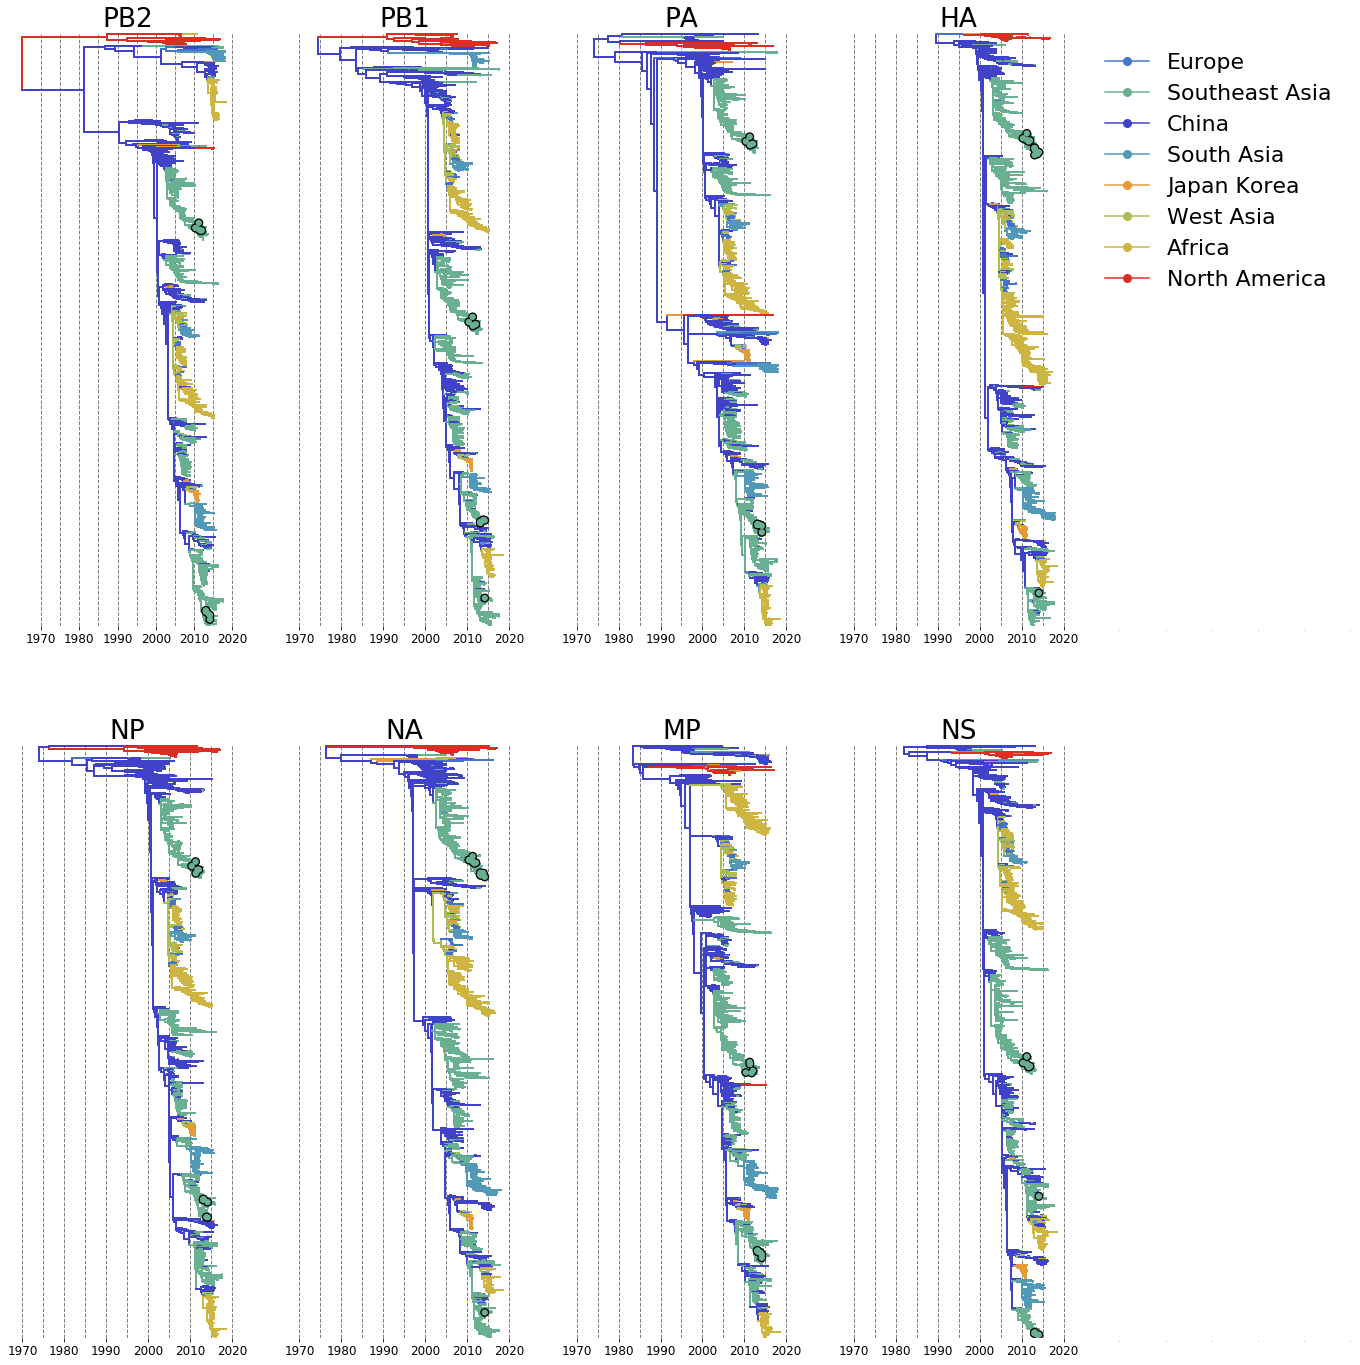

In [7]:
fig,((ax1,ax2,ax3,ax4,ax9),(ax5,ax6,ax7,ax8, ax10)) = plt.subplots(2, 5, figsize=(24,24),facecolor='w')

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

branchWidth=1 ## default branch width

# this sets the grey vertical shading 
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

# set up the grey areas and dashed lines
for a in axes:

    # this sets the vertical dashed lines on the tree
    [a.axvline(i,ls='--',lw=1,color='grey',zorder=0) for i in range(1970,2025,5)]


for t,tr in enumerate(trees): ## iterate over trees
    if t == 0:
        a = ax1
        title = "PB2"
    if t == 1:
        a = ax2
        title = "PB1"
    if t == 2: 
        a = ax3
        title = "PA"
    if t == 3:
        a = ax4
        title = "HA"
    if t == 4:
        a = ax5
        title = "NP"
    if t == 5:
        a = ax6
        title = "NA"
    if t == 6: 
        a = ax7
        title = "MP"
    if t == 7:
        a = ax8
        title = "NS"
    
    # copied and pasted from above
    for k in tr.Objects: ## iterate over objects in tree
        
        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x
        
        c='k'
        if k.traits.has_key(PB2_json_meta['traitName']):
            c=tr.cmap[k.traits[PB2_json_meta['traitName']]]
    
        branchWidth=2
    
        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in mylist:
                s=40 ## tip size can be fixed
                shape = 'o'
            else:
                s=0
                shape = 'o'
            
            # mark A/Goose/Guangdong/1/1996 with an X
            #if k.traits['strain'] == 'A/Goose/Guangdong/1/1996':
                #c="#000000"
                #shape = "X"
                #s=120
            #else:
                #shape = 'o'

        
            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath
    
        elif k.branchType=='node': ## if node...
            #branchWidth+=10.0*len(k.leaves)/float(L)   # make deeper branches fatter
            #c="#9F9F9F"
        
            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')
        
        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

    
    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    
    a.set_ylim(-5,tr.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
    a.set_xticklabels([1970, 1980, 1990, 2000, 2010, 2020], fontsize=12)

    
    # add a title to each subplot
    a.set_title(title)
    
# add in a legend
han_list = []

for key in colors:
    marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title(), markersize = 8)
    han_list.append(marker)
ax9.legend(handles = han_list,markerfirst = True, frameon=False, loc=1)

# format legend and empty plot; set axis limits, remove border lines         
ax9.spines['left'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.tick_params(axis='y',labelsize=0,size=0)
ax9.tick_params(axis='x',labelsize=0,size=0)
ax9.set_yticklabels([])
ax10.spines['left'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax10.tick_params(axis='y',labelsize=0,size=0)
ax10.tick_params(axis='x',labelsize=0,size=0)
ax10.set_yticklabels([])


plt.savefig('/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-02-20/Fig-1-tree-2019-03-01.pdf')
plt.show()


## Plot with colors by host 

In [17]:
trees = [PB2_tree, PB1_tree, PA_tree, HA_tree, NP_tree, NA_tree, MP_tree, NS_tree]
mylist = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]

duck = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014"]
human = ["A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]

colors = {"human":"#5c3d46", "duck":"#99bfaa"}

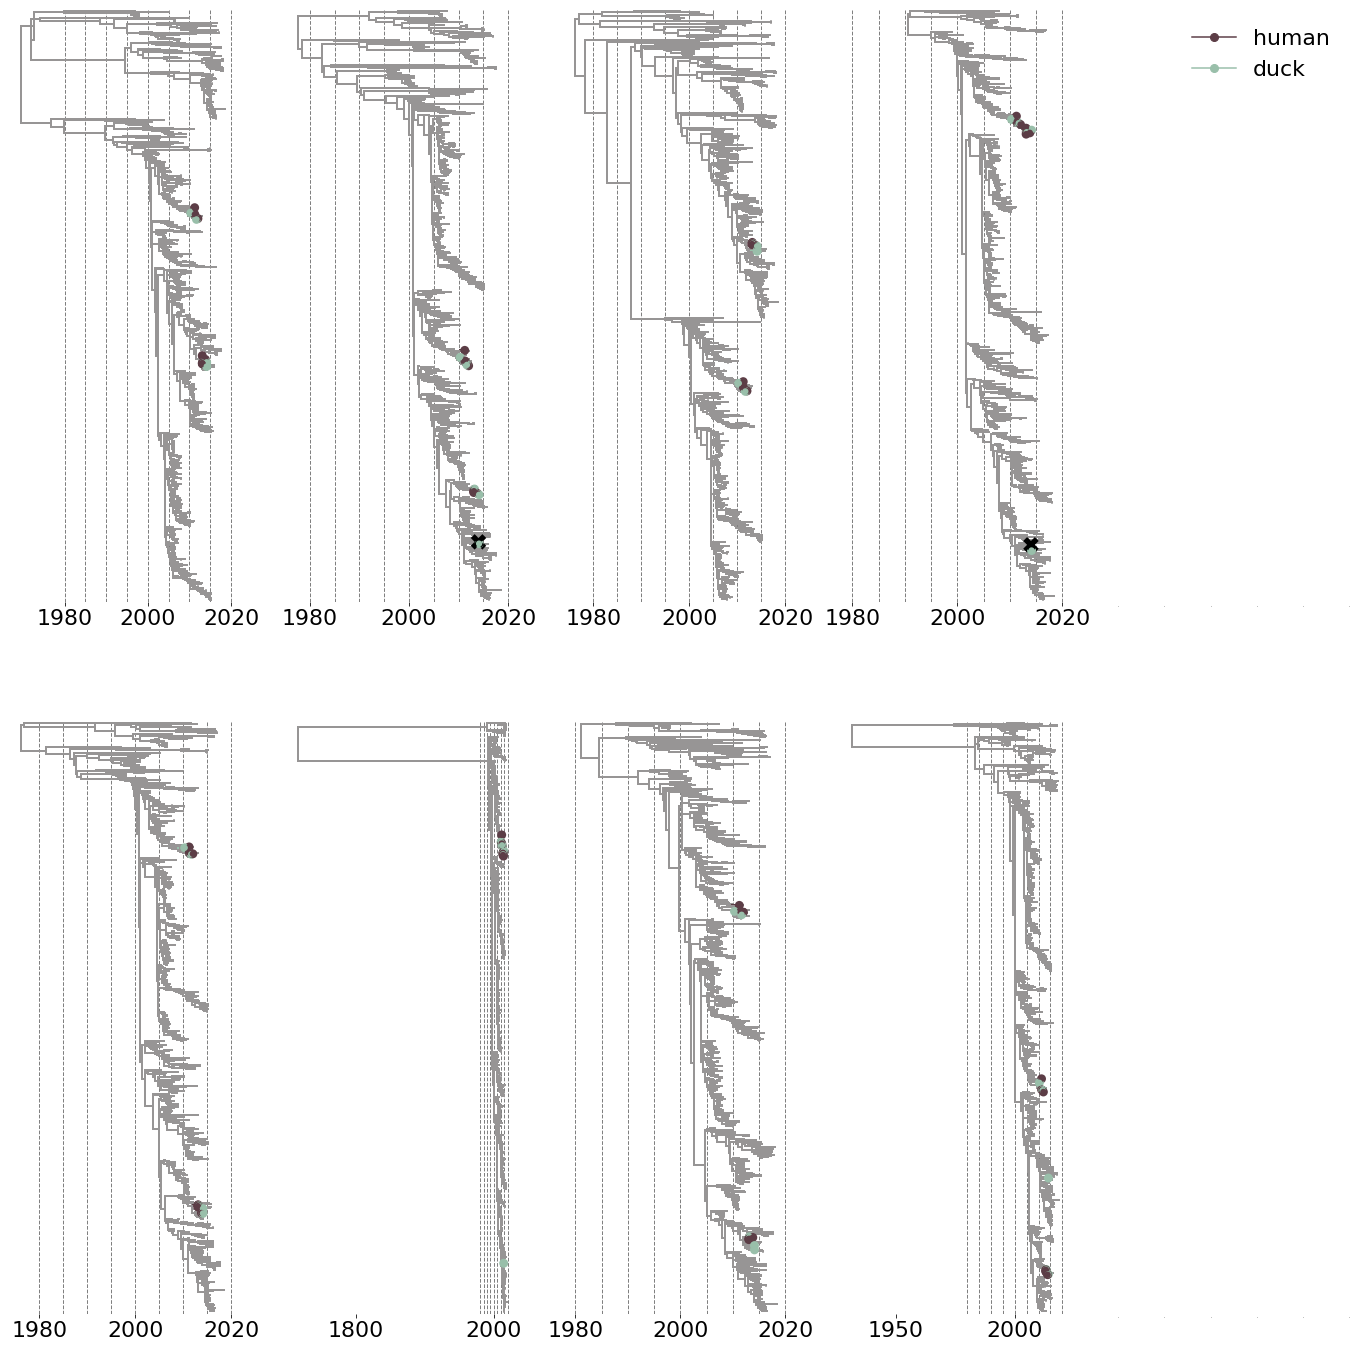

In [18]:
fig,((ax1,ax2,ax3,ax4,ax9),(ax5,ax6,ax7,ax8, ax10)) = plt.subplots(2, 5, figsize=(24,24),facecolor='w')

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

branchWidth=1 ## default branch width

# this sets the grey vertical shading 
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1980,2025) for m in range(0,36)]

# set up the grey areas and dashed lines
for a in axes:

    # this sets the vertical dashed lines on the tree
    [a.axvline(i,ls='--',lw=1,color='grey',zorder=0) for i in range(1980,2025,5)]


for t,tr in enumerate(trees): ## iterate over trees
    if t == 0:
        a = ax1
    if t == 1:
        a = ax2
    if t == 2: 
        a = ax3
    if t == 3:
        a = ax4
    if t == 4:
        a = ax5
    if t == 5:
        a = ax6
    if t == 6: 
        a = ax7
    if t == 7:
        a = ax8
    
    # copied and pasted from above
    for k in tr.Objects: ## iterate over objects in tree
        
        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x
        
        c='k'
        if k.traits.has_key(PB2_json_meta['traitName']):
            c=tr.cmap[k.traits[PB2_json_meta['traitName']]]
            #if k.traits[PB2_json_meta['traitName']] != "southeast_asia":
                #c='#dbd9d9'
            #else:
            c='#979595'
 
        branchWidth=2
    
        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in mylist:
                s=40 ## tip size can be fixed
            else:
                s=0
            
            # define color by host
            if k.traits['strain'] in mylist:
                if k.traits['strain'] in human:
                    c="#5c3d46"
                    shape = "o"
                else:
                    c="#99bfaa"
                    shape = "o"
            if k.traits['strain'] == 'A/muscovy_duck/Vietnam/LBM573/2014':
                c="#000000"
                shape = "X"
                s=120
            else:
                shape = 'o'
        
            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor=c,edgecolor='none',marker=shape, zorder=10) ## plot black circle underneath
    
        elif k.branchType=='node': ## if node...
             
            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')
        
        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

    
    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    
    a.set_ylim(-5,tr.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    
        
# add in a legend
han_list = []

for key in colors:
    marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key,markersize = 8)
    han_list.append(marker)
ax9.legend(handles = han_list,markerfirst = True, frameon=False, loc=1)

# format legend and empty plot; set axis limits, remove border lines         
ax9.spines['left'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.tick_params(axis='y',labelsize=0,size=0)
ax9.tick_params(axis='x',labelsize=0,size=0)
ax9.set_yticklabels([])
ax10.spines['left'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax10.tick_params(axis='y',labelsize=0,size=0)
ax10.tick_params(axis='x',labelsize=0,size=0)
ax10.set_yticklabels([])


plt.savefig('/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-01-08/full-genome-nextstrain-host-2019-02-05.pdf')
plt.show()